In [1]:
import tensorflow as tf
import keras
import retina
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

In [24]:
df = pd.read_csv(retina.filesys.TRAINING_DATA_CSV_PATH, index_col=False)
labels = df["label"]
df = df.drop(columns=["label"])
df

,texture-1,texture-2,texture-3,texture-4,texture-5,texture-6,texture-7,texture-8,texture-9,texture-10,...,texture-375,texture-376,texture-377,texture-378,texture-379,texture-380,texture-381,texture-382,texture-383,texture-384
0,0.007153,0.001319,0.001458,0.000208,0.001458,0.004028,0.008194,0.000764,0.001319,0.000000,...,0.000347,0.001042,0.003194,0.001667,0.006389,0.004861,0.002153,0.000347,0.000833,0.001042
1,0.007083,0.002431,0.002361,0.000139,0.000069,0.003542,0.008472,0.000625,0.001250,0.000000,...,0.004028,0.000000,0.000417,0.000556,0.005625,0.000556,0.001667,0.005139,0.001319,0.001319
2,0.010417,0.002639,0.000694,0.000347,0.001042,0.000486,0.008403,0.001042,0.002083,0.000069,...,0.000625,0.000000,0.002153,0.003125,0.007569,0.003194,0.000764,0.001181,0.001319,0.001597
3,0.008681,0.001667,0.001042,0.000556,0.000903,0.002778,0.009444,0.000486,0.001458,0.000000,...,0.000417,0.000347,0.001319,0.000486,0.004653,0.003889,0.001181,0.001250,0.003750,0.000903
4,0.004722,0.002361,0.002569,0.000000,0.000208,0.005764,0.005486,0.000556,0.002083,0.000417,...,0.000000,0.000139,0.001597,0.000417,0.005347,0.001806,0.001875,0.003681,0.002292,0.000625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.004167,0.001319,0.001389,0.000139,0.001875,0.006736,0.002847,0.000833,0.003403,0.000139,...,0.002014,0.000764,0.001806,0.001250,0.002569,0.005139,0.003264,0.001181,0.000972,0.002500
427,0.003333,0.001042,0.000833,0.000000,0.001458,0.008958,0.002847,0.000833,0.003403,0.000069,...,0.001319,0.002222,0.002639,0.003056,0.003472,0.003125,0.001806,0.000347,0.004514,0.002361
428,0.005000,0.000625,0.001250,0.000556,0.001042,0.007153,0.006042,0.000764,0.001597,0.000278,...,0.001319,0.001042,0.002292,0.002431,0.004861,0.001667,0.001389,0.003125,0.002986,0.001597
429,0.005000,0.001181,0.001875,0.000208,0.001319,0.006042,0.001944,0.000625,0.003611,0.000069,...,0.003125,0.000833,0.001736,0.003403,0.003542,0.000972,0.000625,0.002153,0.004236,0.004097


In [29]:
dataset = tf.data.Dataset.from_tensor_slices((df, labels))
train_dataset, test_dataset = keras.utils.split_dataset(dataset, shuffle=True, seed=42, left_size=0.7)
train_dataset, validation_dataset = keras.utils.split_dataset(train_dataset, shuffle=True, seed=42, left_size=0.7)

train_dataset: tf.data.Dataset = train_dataset.repeat(5).shuffle(100).batch(16)
test_dataset: tf.data.Dataset = test_dataset.batch(16)
validation_dataset: tf.data.Dataset = validation_dataset.batch(16)

dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(384,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

In [31]:
model = keras.Sequential([
  keras.layers.Input(shape=dataset.element_spec[0].shape),
  keras.layers.Dense(256, activation="relu"),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(64, activation="relu"),
  keras.layers.Dense(6, activation="softmax"),
])

model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001), # type: ignore
  loss=keras.losses.SparseCategoricalCrossentropy(),
  metrics=["accuracy"],
)

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,102 (547.27 KB)

 Trainable params: 140,102 (547.27 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(
  train_dataset, epochs=15,
  validation_data=validation_dataset,
)

Epoch 1/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2676 - loss: 1.7729 - val_accuracy: 0.2088 - val_loss: 1.8224
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2915 - loss: 1.7267 - val_accuracy: 0.2088 - val_loss: 1.7924
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2899 - loss: 1.6931 - val_accuracy: 0.2747 - val_loss: 1.7436
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3667 - loss: 1.5447 - val_accuracy: 0.3297 - val_loss: 1.5744
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4506 - loss: 1.2906 - val_accuracy: 0.3736 - val_loss: 1.5312
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5256 - loss: 1.1438 - val_accuracy: 0.4176 - val_loss: 1.5132
Epoch 7/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5892 - loss: 1.0224 - val_accuracy: 0.5275 - val_loss: 1.3376
Epoch 8/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7211 - loss: 0.8001 - val_accuracy: 0.5385 - val_loss:

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


C:\Users\Davin Tristan\AppData\Local\Temp\ipykernel_29712\2105622587.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


{'Angry': {'precision': 0.631578947368421,
  'recall': 0.6666666666666666,
  'f1-score': 0.6486486486486487,
  'support': 18.0},
 'Disgusted': {'precision': 0.6666666666666666,
  'recall': 0.4,
  'f1-score': 0.5,
  'support': 15.0},
 'Happy': {'precision': 0.9,
  'recall': 0.8181818181818182,
  'f1-score': 0.8571428571428571,
  'support': 33.0},
 'Neutral': {'precision': 0.5,
  'recall': 0.7272727272727273,
  'f1-score': 0.5925925925925926,
  'support': 22.0},
 'Sad': {'precision': 0.6363636363636364,
  'recall': 0.7368421052631579,
  'f1-score': 0.6829268292682927,
  'support': 19.0},
 'Surprised': {'precision': 0.9411764705882353,
  'recall': 0.7272727272727273,
  'f1-score': 0.8205128205128205,
  'support': 22.0},
 'accuracy': 0.7054263565891473,
 'macro avg': {'precision': 0.7126309534978265,
  'recall': 0.6793726741095162,
  'f1-score': 0.6836372913608687,
  'support': 129.0},
 'weighted avg': {'precision': 0.735389244158774,
  'recall': 0.7054263565891473,
  'f1-score': 0.7094985

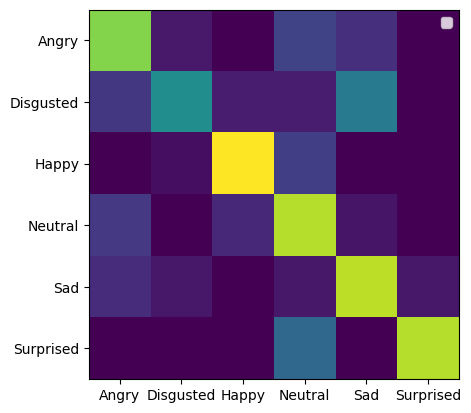

In [33]:
from typing import cast

confidences = model.predict(test_dataset)
predictions = np.argmax(confidences, axis=1)

labels = cast(list[int], list(test_dataset.unbatch().map(lambda x, y: y).as_numpy_iterator()))
target_names = retina.face.FacialExpressionLabel.target_names()

cmat = sklearn.metrics.confusion_matrix(labels, predictions, normalize="true")

plt.imshow(cmat)
plt.legend()
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)

sklearn.metrics.classification_report(labels, predictions, output_dict=True, target_names=target_names)

In [7]:
model.save(retina.filesys.EXPRESSION_RECOGNITION_MODEL_PATH)

C:\Users\Davin Tristan\AppData\Local\Temp\ipykernel_29712\469801421.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  accuracy_fig.show()


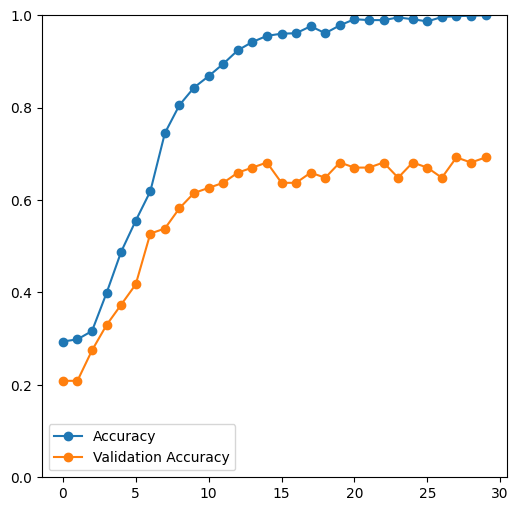

In [34]:
accuracy_fig = plt.figure(figsize=(6,6))
ax = accuracy_fig.add_subplot()
ax.plot(history.history["accuracy"], label="Accuracy", marker='o')
ax.plot(history.history["val_accuracy"], label="Validation Accuracy", marker='o')
ax.legend()
ax.set_ylim(0, 1)
accuracy_fig.show()